<a href="https://colab.research.google.com/github/awangberg/AdvLinearAlgebra/blob/master/Project_4_Case_3_An_Interesting_Case_using_Singular_Values_and_Best_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
#  Libraries that we'll need:
import numpy as np
import sympy as sym
#from scipy import misc
from scipy import linalg
#from PIL import Image
#import imageio
import matplotlib.pyplot as plt
# importing "random" for random operations 
import random 
from sklearn.metrics import mean_squared_error

#  Singular Value Decomposition and Best Fit

We look at some data generated here from three sources:

*   Case 0:  A known polynomial function $f(x) = 4 - 3x^2 + 5x^6$
*   Case 1:  A known trigonometric function $f(x) = 4 - 2\cos(x) + \cos^2 (x)$
*   Case 2:  A matrix of data $M$ (specified below) with unknown source function
*   Case 3:  An interesting case.

# Overview for Case 3:  An interesting case:

For Case 3, you have the option of completing one of the following tasks:

* **Option A:**  Re-do Case 0 or Case 1 by adding noise to the function.

Using $f$ + (2*random.random()-1)  will add a random number between -1 and 1 to the value of $f$.  How much noise can your method absorb and still produce accurate results?  (e.g. noise with a range of $-1$ to $1$?  noise from a range of $-5$ to $5$?  noise from $-30$ to $30$?)  Which method (best-fit or SVD) accommodates a larger range of error?

* **Option B:**  Best Fit for a plane

Instead of matching a function $x \to f(x)$ using a 8th degree polynomial, make a multivariable function $(x_1,x_2) \to f(x_1,x_2)$ where $f$ is a 3rd degree polynomial in $x_1$ and $x_2$. Generate data based on at least 16 different input points. Modify the procedure for choosing the $M$ matrix, and use Best Fit to find the best fit line. 


BONUS for Option B:  Do this for 3 dimensions, with noise, or modify the SVD solution to fit this option

* **Option C:**  The space of continuous functions of one variable has two different bases:


Given an unknown function, we figured out how to write it using basis of polynomials.  We could also have determined how to write it as a basis of powers of sine and cosine functions. Fit the polynomial $f(x) = 4 - 3x^2 + 5x^6$ to a basis of sine & cosine functions of at most power 4. Plot the original function and the best-fit function.

BONUS for Option C:  Include noise via $f(x)$ + (2*random.random()-1), and find a way to measure the error in your approximation to the function f(x).  What is the effect of this noise on your approximation?


In each case, it may be helpful to re-use data from the previous cases by copy-and-paste into cells below.  Be sure to specify which option you are addressing.

## Option A adding noise to a known function

In [155]:
AMOUNT_NOISE = 10
NUM_SIGS = 7
NUM_DATA_POINTS = 15

actual_data_x = []
actual_data_y = []


for i in range(NUM_DATA_POINTS):
    noise = random.uniform(-AMOUNT_NOISE,AMOUNT_NOISE)
    x = 6*random.random() - 3
    f = (4 - 3*x**2 + 5*x**6)+noise
    actual_data_x.append(x)
    actual_data_y.append(f)

M_entries = []

for x in actual_data_x:
  M_entries.append([1, x, x**2, x**3, x**4, x**5, x**6])

M = []
M = np.matrix(M_entries)

b = []
b = (np.matrix(actual_data_y)).transpose()

c = linalg.inv(M.transpose() * M) * M.transpose() * b

bf_error = np.sqrt(((b-M*c).transpose() * (b-M*c))[0,0])
print(f'Noise: +/- {AMOUNT_NOISE}')
print(f'Error: {bf_error}')

U, S, Vh = linalg.svd(M)
Vh = Vh.T

sigma = np.zeros((U.shape[1], Vh.shape[0]))
for i in range(min(sigma.shape)):
     sigma[i, i] = S[i]
#Reconstruct the matrix:
a1 = np.dot(U, np.dot(sigma, Vh))

useSigs = NUM_SIGS

#Use these parts of U, S, and Vh
(Vrows, Vcols) = Vh.shape
(Urows, Ucols) = U.shape
U_use = U[:Urows, :useSigs]
Vh_use = Vh[:Vrows, :useSigs]
sigma_use = sigma[:useSigs, :useSigs]

#discard these parts of U, S, and Vh:
U_d = U[:Urows, useSigs:]
Vh_d = Vh[:Vrows, useSigs:]
sigma_d = sigma[useSigs:, useSigs:]

svdsol = (Vh_use @ linalg.inv(sigma_use) @ U_use.transpose()) @ b

svd_error = np.sqrt(((b-M*svdsol).transpose() * (b-M*svdsol))[0,0])
print(f'Noise: +/- {AMOUNT_NOISE}')
print(f'Error: {svd_error}')

Noise: +/- 10
Error: 14.661695724729961
Noise: +/- 10
Error: 14.661695724730036


## Test Data Points with noise and graph of actual function

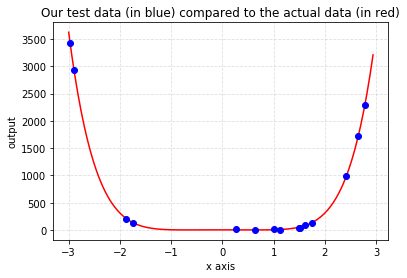

In [156]:
x = sym.symbols('x')

xdata = []
fdata = []

xdata = np.array(range(100))/(100/6) - 3

fdata = 4 - 3*xdata**2 + 5*xdata**6

plt.plot(xdata,fdata, color='red') + plt.plot(actual_data_x, actual_data_y, 'bo')

plt.title('Our test data (in blue) compared to the actual data (in red)')

plt.xlabel('x axis')
plt.ylabel('output')

plt.grid(alpha=.4,linestyle='--')

## Method of Best Fit

Noise: +/- 10
Error: 14.661695724729961


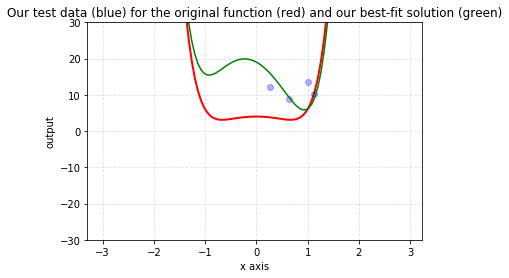

In [157]:
x = sym.symbols('x')

xdata = []
fdata = []

xdata = np.array(range(100))/(100/6) - 3

fdata = 4 - 3*xdata**2 + 5*xdata**6

best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6)

plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3)+plt.plot(xdata,best_fit, color='green')

plt.ylim(-30,30)

plt.title('Our test data (blue) for the original function (red) and our best-fit solution (green)')

plt.xlabel('x axis')
plt.ylabel('output')

plt.grid(alpha=.4,linestyle='--')

bf_error = np.sqrt(((b-M*c).transpose() * (b-M*c))[0,0])
print(f'Noise: +/- {AMOUNT_NOISE}')
print(f'Error: {bf_error}')

## SVD Method

Noise: +/- 10
Error: 14.661695724730036


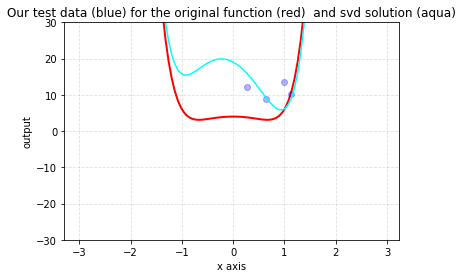

In [158]:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

#construct the solution from svdsol
svd_fit = svdsol[0,0] + svdsol[1,0]*xdata + svdsol[2,0]*(xdata**2) + svdsol[3,0]*(xdata**3) + svdsol[4,0]*(xdata**4) + svdsol[5,0]*(xdata**5) + svdsol[6,0]*(xdata**6)
# Create the actual plot in red, and our datapoints in blue,
# and the svd solution in aqua:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3) + plt.plot(xdata, svd_fit, 'aqua')

#Restrict the output values to this range:
plt.ylim(-30,30)
# Add a title
plt.title('Our test data (blue) for the original function (red)  and svd solution (aqua)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

svd_error = np.sqrt(((b-M*svdsol).transpose() * (b-M*svdsol))[0,0])
print(f'Noise: +/- {AMOUNT_NOISE}')
print(f'Error: {svd_error}')

## Let's loop through different Noise Levels and see how the error responds

In [145]:
noise_levels = np.linspace(0,100,100)
bf_error_list = []
svd_error_list = []
for amnt_noise in noise_levels:
    NUM_SIGS = 7
    NUM_DATA_POINTS = 15

    actual_data_x = []
    actual_data_y = []


    for i in range(NUM_DATA_POINTS):
        noise = random.uniform(-amnt_noise,amnt_noise)
        x = 6*random.random() - 3
        f = (4 - 3*x**2 + 5*x**6)+noise
        actual_data_x.append(x)
        actual_data_y.append(f)

    M_entries = []

    for x in actual_data_x:
      M_entries.append([1, x, x**2, x**3, x**4, x**5, x**6])

    M = []
    M = np.matrix(M_entries)

    b = []
    b = (np.matrix(actual_data_y)).transpose()

    c = linalg.inv(M.transpose() * M) * M.transpose() * b

    U, S, Vh = linalg.svd(M)
    Vh = Vh.T

    sigma = np.zeros((U.shape[1], Vh.shape[0]))
    for i in range(min(sigma.shape)):
         sigma[i, i] = S[i]
    #Reconstruct the matrix:
    a1 = np.dot(U, np.dot(sigma, Vh))

    useSigs = NUM_SIGS

    #Use these parts of U, S, and Vh
    (Vrows, Vcols) = Vh.shape
    (Urows, Ucols) = U.shape
    U_use = U[:Urows, :useSigs]
    Vh_use = Vh[:Vrows, :useSigs]
    sigma_use = sigma[:useSigs, :useSigs]

    #discard these parts of U, S, and Vh:
    U_d = U[:Urows, useSigs:]
    Vh_d = Vh[:Vrows, useSigs:]
    sigma_d = sigma[useSigs:, useSigs:]

    svdsol = (Vh_use @ linalg.inv(sigma_use) @ U_use.transpose()) @ b

    bf_error = np.sqrt(((b-M*c).transpose() * (b-M*c))[0,0])
    bf_error_list.append(bf_error)
    
    svd_error = np.sqrt(((b-M*svdsol).transpose() * (b-M*svdsol))[0,0])
    svd_error_list.append(svd_error)

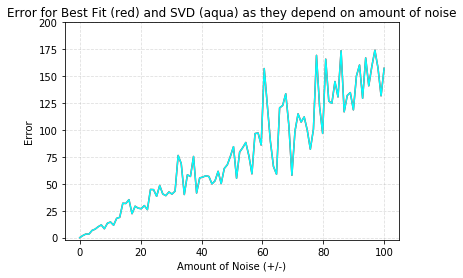

In [164]:
plt.plot(noise_levels,bf_error_list, 'red') + plt.plot(noise_levels,svd_error_list, 'aqua')

plt.ylim(-2,200)

plt.title('Error for Best Fit (red) and SVD (aqua) as they depend on amount of noise')

plt.xlabel('Amount of Noise (+/-)')
plt.ylabel('Error')

plt.grid(alpha=.4,linestyle='--')


In [ ]:
'''
Reflection:
A few main takeaways I have from this project: 
First, that these two methods perform almost exactly the same as measured by their error scores; as shown in the Error vs Noise 
plot, the line for the Best Fit method is not even visible as it is completely aligned with that of the SVD Method. I would be
interested to see if this is always the case or if this is a specific situation where they happen to be so similar.

By Observing the graphs and error levels, it appears both methods fit relatively well up to about +/- 5 or +/- 10 noise. More
noise than that and you start to lose sight of what used to be the function.

'''